In [1]:
import os
import matplotlib.pyplot as plt
import scanpy as sc
import scvi

/local/data/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/local/data/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [2]:
save_path = "data"
url = (
    "https://github.com/YosefLab/scVI-data/raw/master/pbmc_10k_protein_v3.h5ad?raw=true"
)
adata = sc.read(os.path.join(save_path, "pbmc_10k_protein_v3.h5ad"), backup_url=url)

adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=10e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`

sc.pp.highly_variable_genes(
    adata, flavor="seurat_v3", layer="counts", n_top_genes=1000, subset=True
)

In [5]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts")
model = scvi.model.SCVI(adata, n_latent = 10, prior_distribution = "normal")

New version.


In [6]:
model.train(max_epochs = 400, plan_kwargs = {"lr":5e-3},check_val_every_n_epoch=10)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

Epoch 10/400:   2%|▎         | 10/400 [00:02<01:48,  3.60it/s, v_num=1, train_loss_step=320, train_loss_epoch=363]

/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


<Axes: xlabel='epoch'>

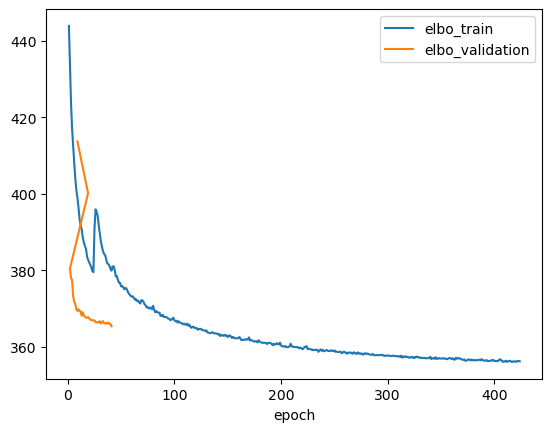

In [6]:
train_elbo = model.history["elbo_train"][1:]
test_elbo = model.history["elbo_validation"]
ax = train_elbo.plot()
test_elbo.plot(ax=ax)